In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys
path = os.getcwd()
while not path.endswith('research'):    
    path = os.path.abspath(os.path.join(path, '../'))
sys.path.append(path)

***

In [3]:
import sys
sys.path.append(r'C:\git\smartdata')

import smartdata
from smartdata.utils.common import print_attributes as pa
from smartdata.utils.dframe import display_full_df as ddff
from smartdata.utils.common import to_namedtuple
from smartdata.utils.file import read_from_json, create_file_name
from smartdata import SmartData

In [4]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

In [5]:
from datetime import datetime, date
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import time

In [6]:
from gmt.fom.gas.shared.utils.common import *
from gmt.fom.gas.shared.utils.dframe import *

In [7]:
from gmt.fom.gas.shared.models.stpb.data.mongo import MongoAdapter

In [8]:
figsize=(8*1.6, 8)

# Data

In [9]:
DATA_PATH = r'\\trading1\Common\gasmodels\short_term_power_burn\data\UK\covariates\Weather'

In [10]:
myData = SmartData()

In [11]:
myData.acquire.from_folder(DATA_PATH)

In [12]:
myData

"sourced" is a main collection

"sourced" collection:
      - df_Weather_Station_Selection_Actual_CSV_1 (rows: 457; columns: 85)
      - df_Weather_Station_Selection_Actual_CSV_2 (rows: 366; columns: 85)
      - df_Weather_Station_Selection_Actual_CSV_3 (rows: 365; columns: 85)
      - df_Weather_Station_Selection_Actual_CSV_4 (rows: 365; columns: 85)
      - df_Weather_Station_Selection_Actual_CSV_5 (rows: 417; columns: 85)

In [13]:
lst = []
for name in myData.sourced.names:
    df = myData.sourced.get(name)
    df.columns = [s.replace('\r\n', '_').replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
 .replace('°', '_grad_').replace('__', '_').replace('europe_uk_', '').lower() for s in df.columns]
    lst.append(df.columns.tolist())
    df = to_pd_todatetime(df, 'area_country_city_gas_day')
    

In [14]:
for s1,s2 in consecutive_pairs_of_list_elements(lst):
    print(set_check(s1, s2))

(set(), set())
(set(), set())
(set(), set())
(set(), set())


In [15]:
res_df = pd.DataFrame()
t = 0
for name in myData.sourced.names:
    df = myData.sourced.get(name)
    t+=df.shape[0]
    res_df = pd.concat([res_df, df], axis=0, sort=True)
res_df.set_index('area_country_city_gas_day', inplace=True)

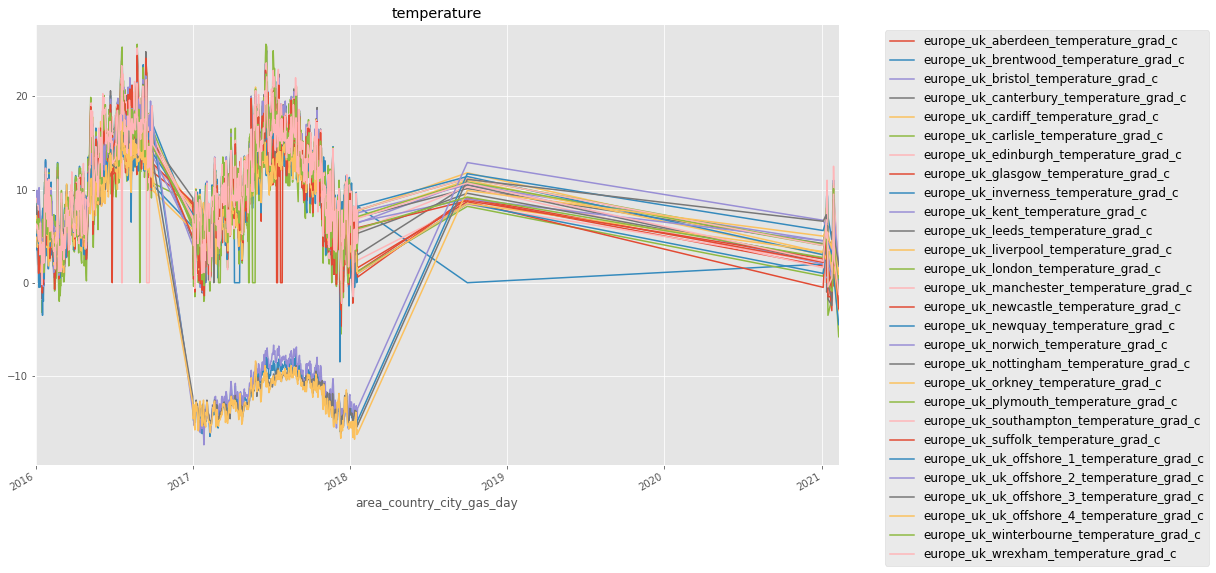

In [16]:
fig, ax = plt.subplots(figsize=(9*1.6, 9))
df = res_df[list(filter(lambda x: 'temperature' in x, res_df))].dropna(axis=0)
df.plot(ax=ax)
fontP = FontProperties()
fontP.set_size('12')
ax.set_title('temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',  prop=fontP)
plt.show()

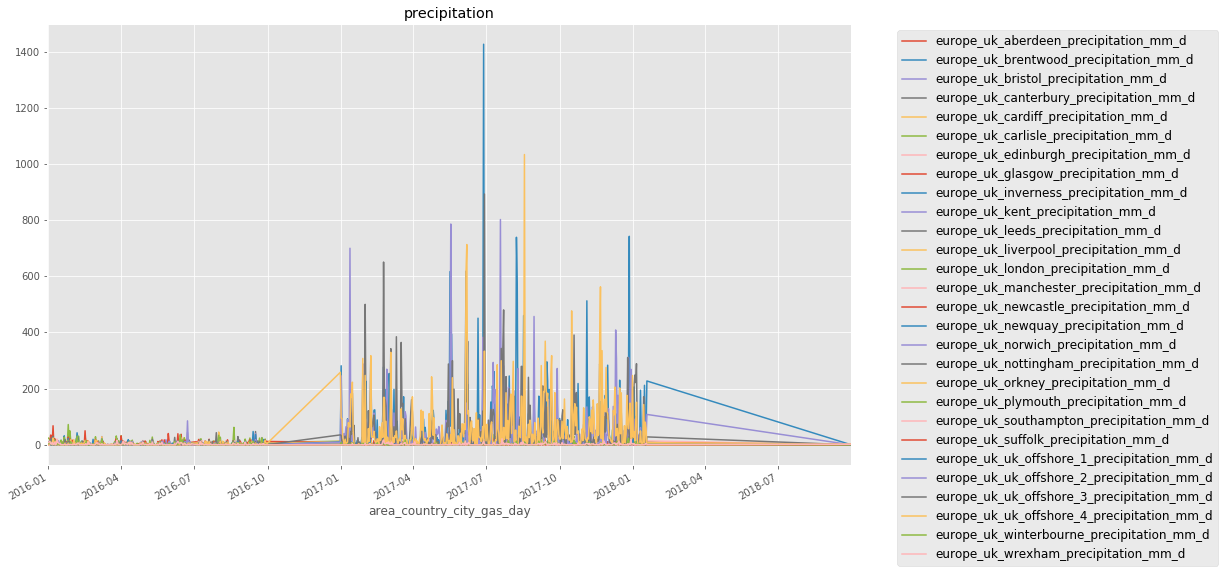

In [17]:
fig, ax = plt.subplots(figsize=(9*1.6, 9))
df = res_df[list(filter(lambda x: 'precipitation' in x, res_df))].dropna(axis=0)
df.plot(ax=ax)
fontP = FontProperties()
fontP.set_size('12')
ax.set_title('precipitation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',  prop=fontP)
plt.show()

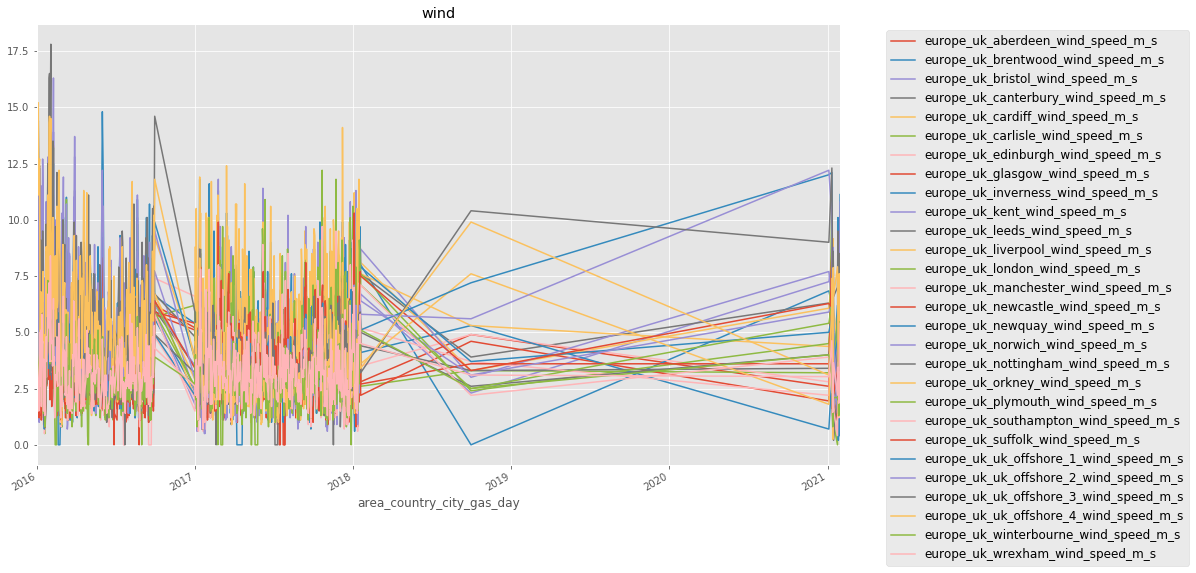

In [18]:
fig, ax = plt.subplots(figsize=(9*1.6, 9))
df = res_df[list(filter(lambda x: 'wind' in x, res_df))].dropna(axis=0)
df.plot(ax=ax)
fontP = FontProperties()
fontP.set_size('12')
ax.set_title('wind')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',  prop=fontP)

plt.show()

## Putting into Mongo

In [19]:
myData = MongoAdapter()

myData.mongo.choose_db(myData.GAS_MODELS_DB)

In [20]:
collection = myData.STPB_COVARIATES_TEMPERATURE
if collection not in myData.mongo.db.list_collection_names():
    myData.mongo.db.create_collection(name=collection)
    myData.mongo.choose_collection(collection)
else:
    myData.mongo.choose_collection(collection)
    myData.mongo.clear_collection()

In [21]:
time.sleep(5) #<---we need time to clean MongoDB collections
myData.mongo.pandas_to_mongo(res_df[[c for c in res_df.columns if 'temperature' in c]].reset_index())

***

In [22]:
collection = myData.STPB_COVARIATES_PRECIPITATION
if collection not in myData.mongo.db.list_collection_names():
    myData.mongo.db.create_collection(name=collection)
    myData.mongo.choose_collection(collection)
else:
    myData.mongo.choose_collection(collection)
    myData.mongo.clear_collection()

In [23]:
time.sleep(5) #<---we need time to clean MongoDB collections
myData.mongo.pandas_to_mongo(res_df[[c for c in res_df.columns if 'precipitation' in c]].reset_index())

***

In [24]:
collection = myData.STPB_COVARIATES_WIND
if collection not in myData.mongo.db.list_collection_names():
    myData.mongo.db.create_collection(name=collection)
    myData.mongo.choose_collection(collection)
else:
    myData.mongo.choose_collection(collection)
    myData.mongo.clear_collection()

In [25]:
time.sleep(5) #<---we need time to clean MongoDB collections
myData.mongo.pandas_to_mongo(res_df[[c for c in res_df.columns if 'wind' in c]].reset_index())

# Retrieving

In [26]:
myData = MongoAdapter()

Retrieving...


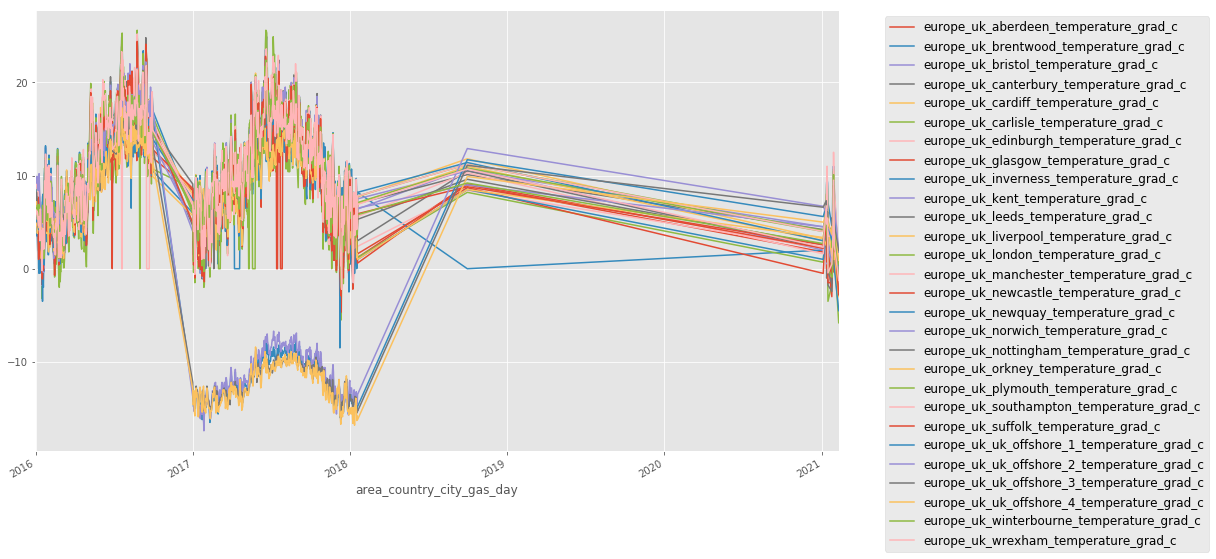

In [27]:
temper = myData.load_covariates_temperature()
myData.plot_weather(temper)

Retrieving...


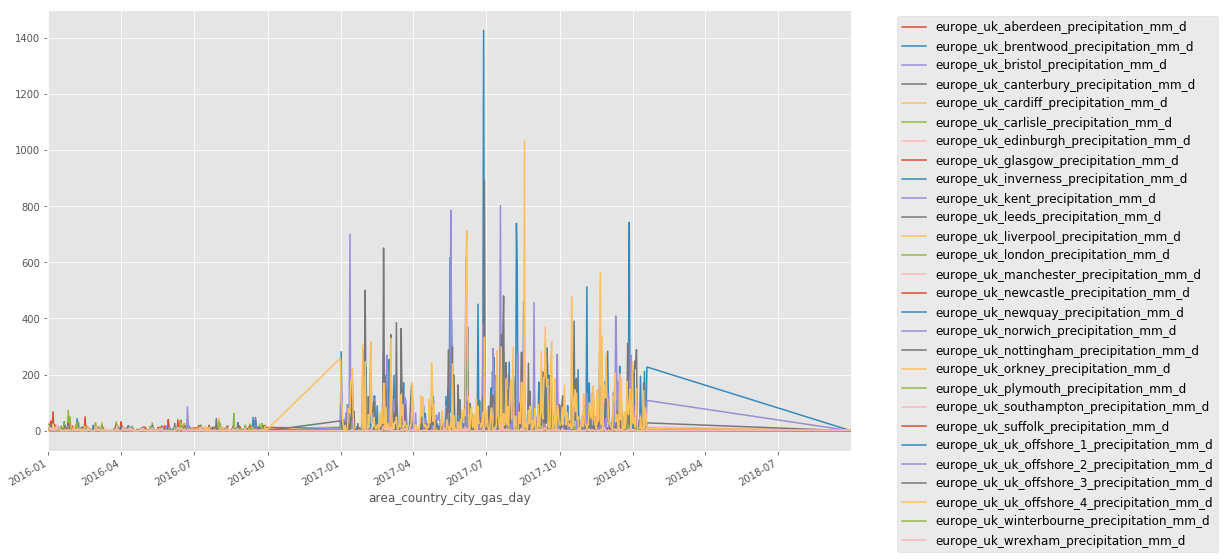

In [28]:
precip = myData.load_covariates_preciptation()
myData.plot_weather(precip)

Retrieving...


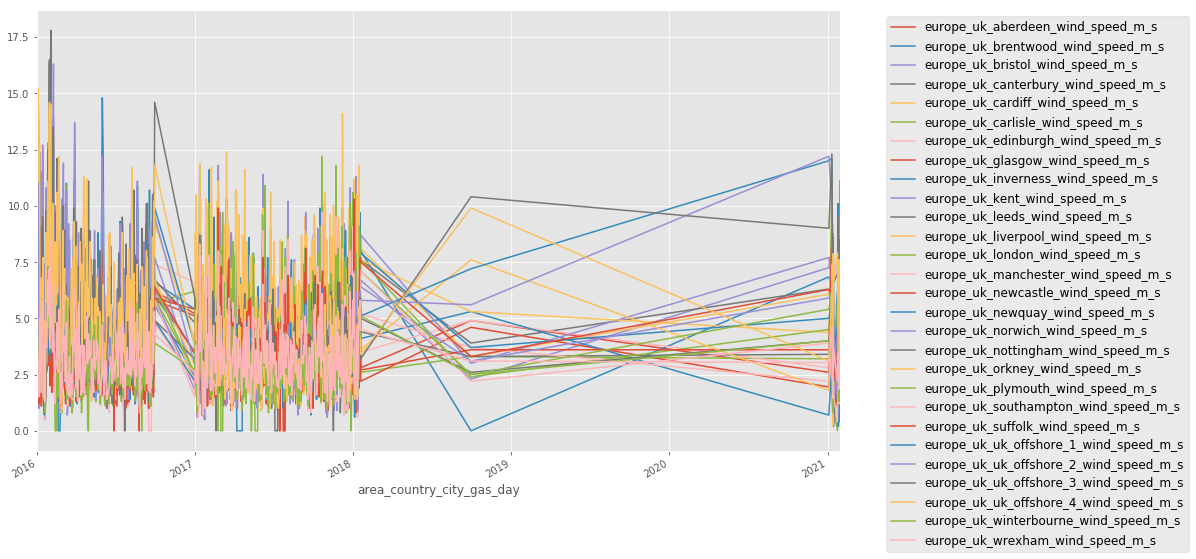

In [29]:
wind = myData.load_covariates_wind()
myData.plot_weather(wind)